<a href="https://colab.research.google.com/github/elabeeel/Modelo-de-regresion-walmart/blob/main/ModeloRegresionWalmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monta tu Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Carga los datos desde tu archivo CSV:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta al archivo CSV en tu Google Drive
file_path = '/content/drive/MyDrive/BD247/Walmart_sales.csv'#Aqui va el archivo desde su drive!!! ESTE ES MI DRIVE Y NO TIENEN PERMISO

# Carga el archivo CSV en un DataFrame de pandas
data = pd.read_csv(file_path)


Tenemos un conjunto de datos que contiene valores de fecha, por lo que tenemos que hacer una de dos cosas o lo cambiamos a numero o lo quitamos, pero en este caso es relevante. ¿por que?

In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = pd.to_datetime(data['Date'])
reference_date = pd.Timestamp('1900-01-01')
data['Date_numeric'] = (data['Date'] - reference_date).dt.days
data.drop('Date', axis=1, inplace=True)


Este código visualizará un diagrama de dispersión que muestra la relación entre las variables 'Date_numeric' y 'Fuel_Price'. Puedes cambiar las variables en el código para visualizar diferentes relaciones o utilizar diferentes tipos de gráficos según tus necesidades. Por ejemplo, podrías usar un gráfico de líneas para visualizar cómo cambia 'Fuel_Price' con el tiempo si 'Date_numeric' representa fechas.

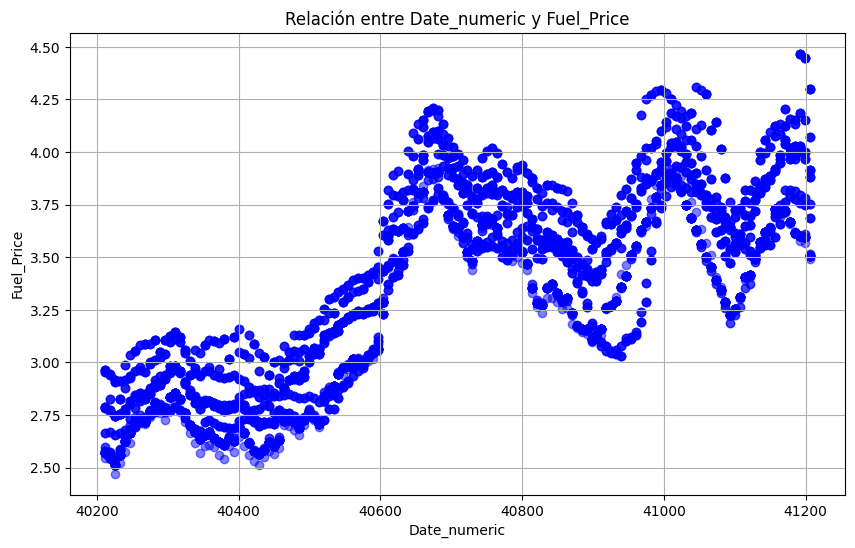

In [4]:
# Visualizar la relación entre dos variables (por ejemplo, 'Date_numeric' y 'Fuel_Price')
plt.figure(figsize=(10, 6))
plt.scatter(data['Date_numeric'], data['Fuel_Price'], color='blue', alpha=0.5)
plt.title('Relación entre Date_numeric y Fuel_Price')
plt.xlabel('Date_numeric')
plt.ylabel('Fuel_Price')
plt.grid(True)
plt.show()

Dividir los datos en características (X) y la variable objetivo (y):

In [5]:
X = data.drop('Fuel_Price', axis=1)  # características
y = data['Fuel_Price']  # variable objetivo


Dividir los datos en conjuntos de entrenamiento y prueba:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenar el modelo de árboles de regresión:

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de árbol de regresión
model = DecisionTreeRegressor()

# Entrenar el modelo
model.fit(X_train, y_train)


DecisionTreeRegressor()

Evaluar el modelo:

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 0.0031091095571095574
R²: 0.9857518204176341


Visualizar los resultados

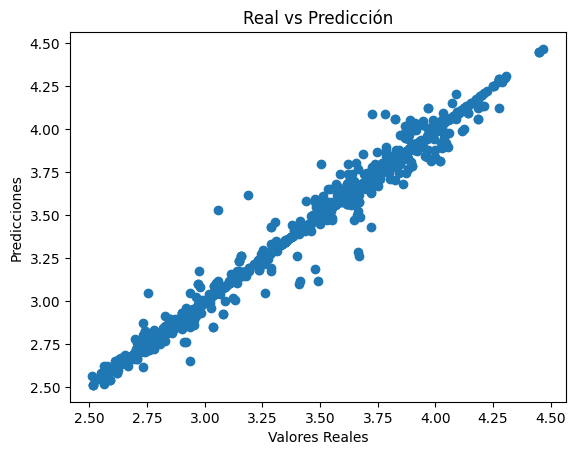

In [10]:
import matplotlib.pyplot as plt

# Crear una gráfica de los valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Real vs Predicción')
plt.show()